<a href="https://colab.research.google.com/github/GuilhermeDS-ML/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import missingno as msno
from IPython.display import display

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/df.csv')

# Data Description

| Variable Name | Description |
|---|---|
| Gender | Gender |
| Ever_Married | Marital status of the customer |
| Age | Age of the customer |
| Graduated | Is the customer a graduate? |
| Profession | Profession of the customer |
| Work_Experience | Work Experience in years |
| Spending_Score | Spending Score |
| Family_Size | Family Size |

# EDA

## Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 752.1+ KB


In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
# Understanding the unique values of each variable
for col in df.columns:
  print(f'\n{col} nunique -> {df[col].nunique()}\n')
  print(f'{df[col].unique()}\n')
  print('-*'*20)


Gender nunique -> 2

['Male' 'Female']

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Ever_Married nunique -> 2

['No' 'Yes' nan]

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Age nunique -> 67

[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Graduated nunique -> 2

['No' 'Yes' nan]

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Profession nunique -> 9

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Work_Experience nunique -> 15

[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Spending_Score nunique -> 3

['Low' 'Average' 'High']

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

Family_Size nunique -> 9

[ 4.  3.  1.  2.  6. nan  5.  8.  7.  

It is likely that the null values in Profession are from people who do not work.

Let's investigate by looking at other variables, mainly Work_Experience and Spending_Score.

In [6]:
df[df['Profession'].isna()].sample(20)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
641,Male,Yes,62,No,NaN,7.0,High,2.0
10201,Female,No,28,No,NaN,0.0,Low,2.0
3662,Female,No,68,No,NaN,2.0,Low,3.0
7523,Female,Yes,71,No,NaN,1.0,Low,1.0
1634,Male,No,31,Yes,NaN,6.0,Low,1.0
10078,Male,No,56,Yes,NaN,1.0,Low,1.0
4275,Male,Yes,40,No,NaN,0.0,Average,2.0
5259,Male,Yes,37,NaN,NaN,2.0,High,5.0
6027,Female,Yes,28,NaN,NaN,8.0,Average,4.0
817,Male,Yes,60,Yes,NaN,0.0,Low,1.0


Some observations fit, having Work_Experience as 0 or null. But the person may have professional experience and be unemployed.

In a real scenario, the ideal would be to clarify these values better with the person who collected the data. But here, we will have to make a decision.

Where Profession and Work_Experience are null, I will not impute due to lack of information.

I will impute according to these criteria:

- Work_Experience != NaN.

- Spending_Score != High. A person without a job would hardly spend a lot.

Note: Work_Experience = 0 does not necessarily mean that the person has never worked (since the variable is represented in years).

In [7]:
def imput_prof(x, work_experience, spending_score):
    if pd.isna(x) and (pd.isna(work_experience) or spending_score != 'High'):
        return 'Unemployed'
    else:
        return x

df['Profession'] = df.apply(lambda row: imput_prof(row['Profession'],
                                                   row['Work_Experience'],
                                                   row['Spending_Score']), axis=1)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(9005, 8)

In [10]:
# Separating the categorical variables from the quantitative ones for plotting
objs = df.select_dtypes(include='object').columns.tolist()
objs

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

In [11]:
nums = [col for col in df.columns if col not in objs]
nums

['Age', 'Work_Experience', 'Family_Size']

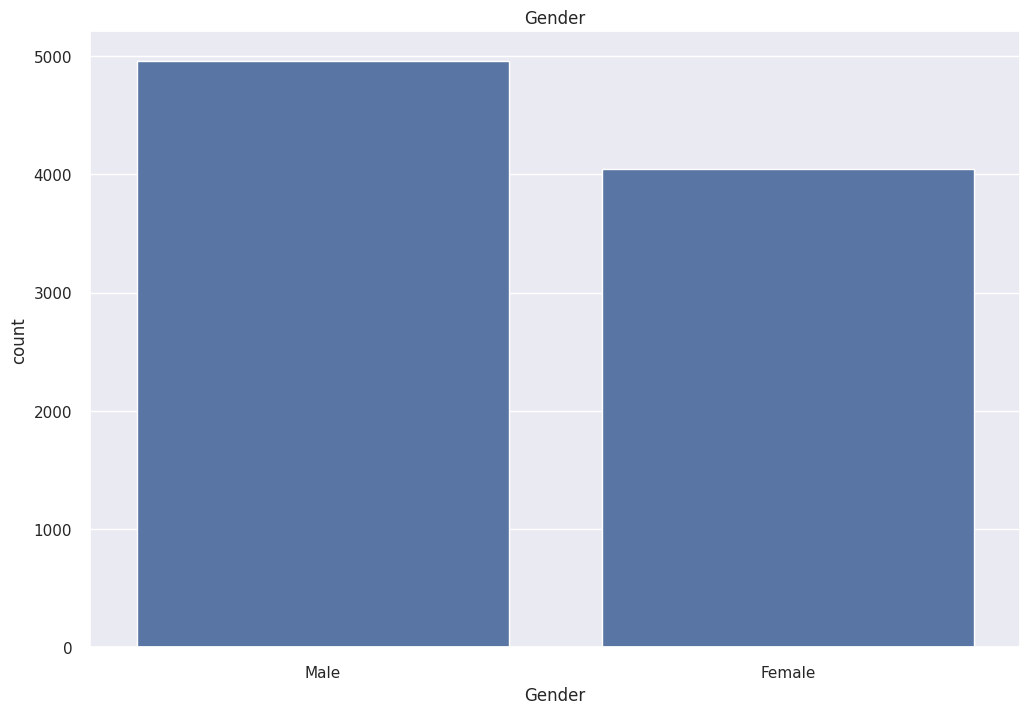


 ---------------------------------------- 



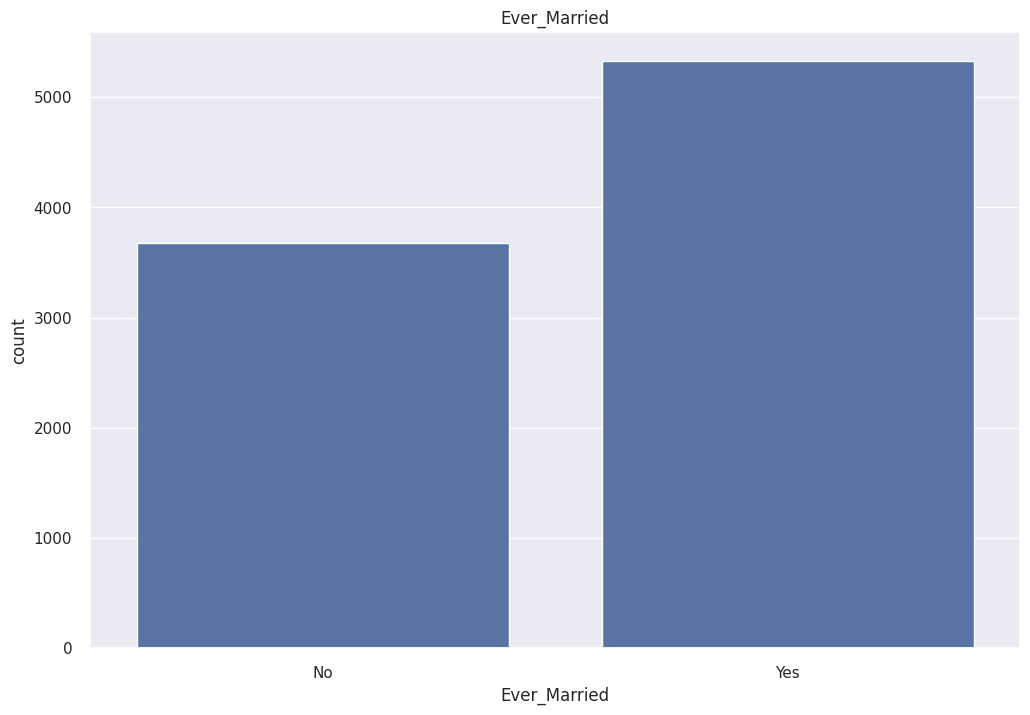


 ---------------------------------------- 



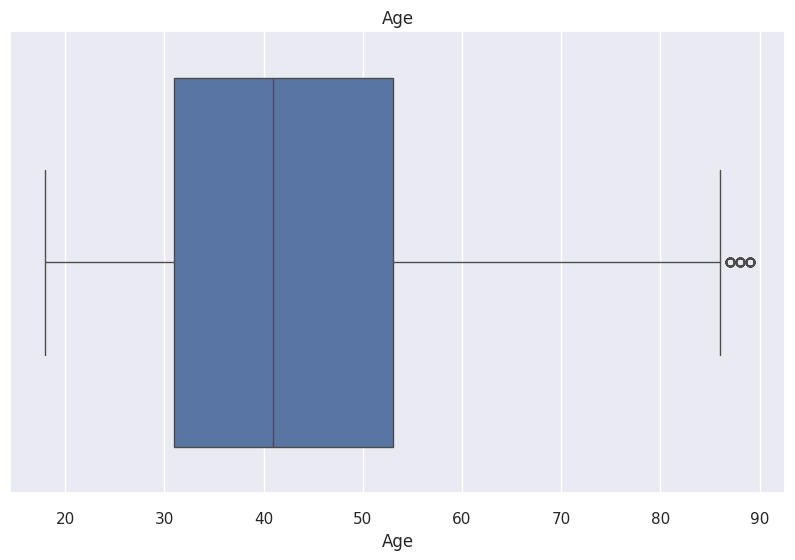


 ---------------------------------------- 



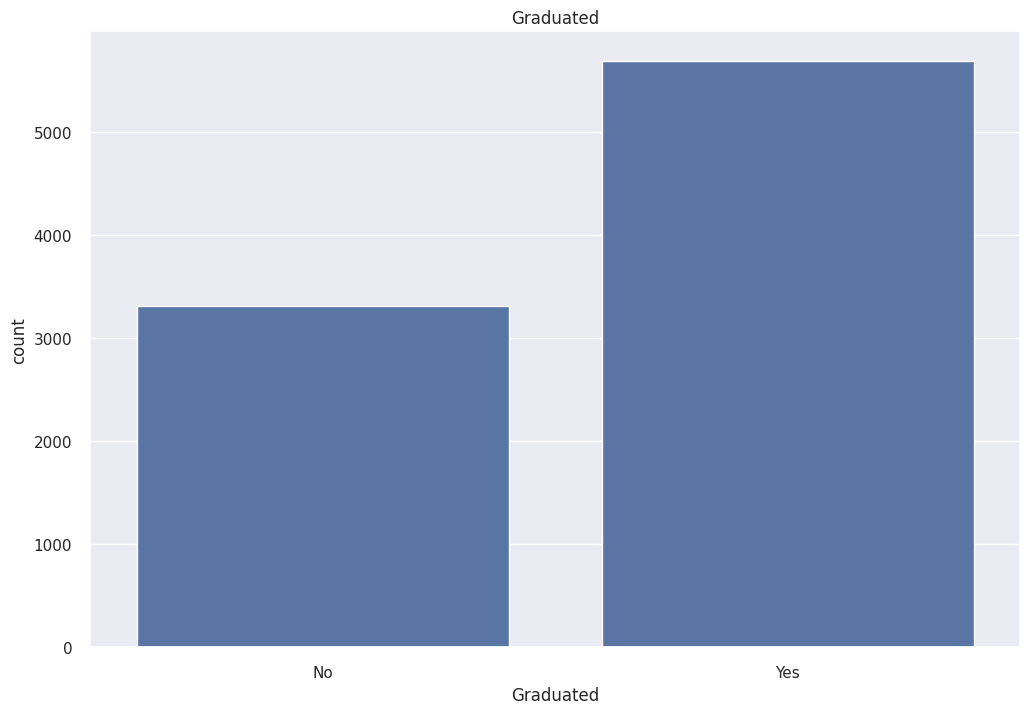


 ---------------------------------------- 



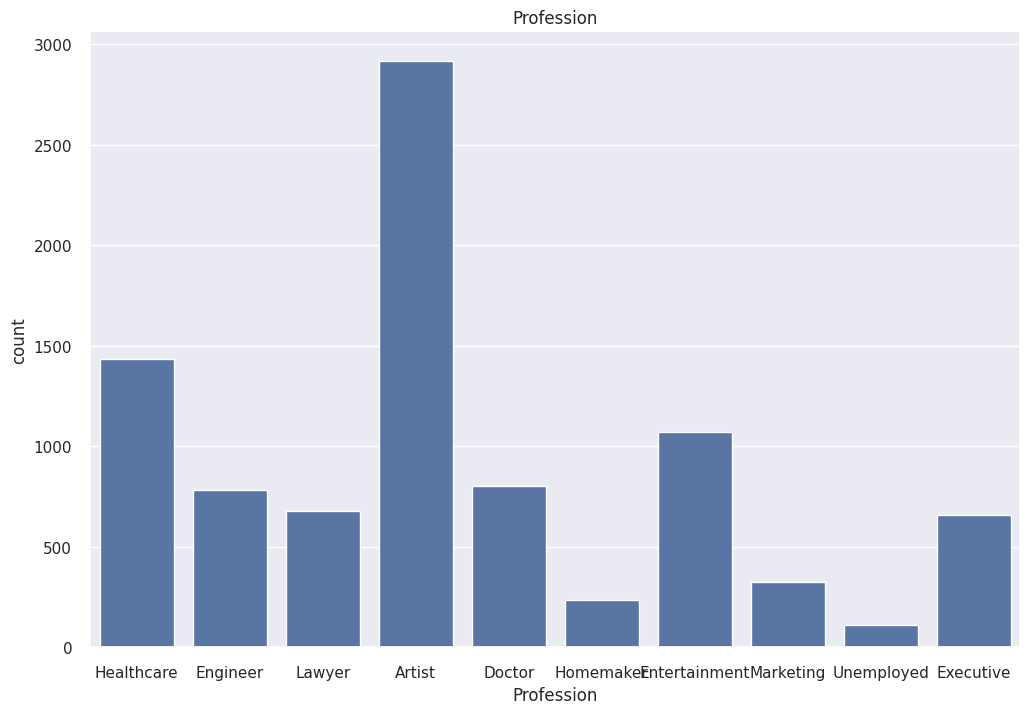


 ---------------------------------------- 



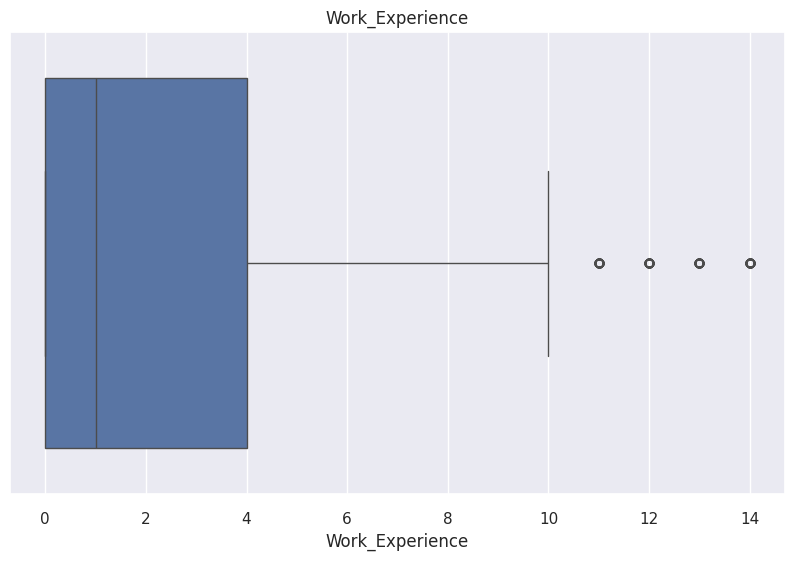


 ---------------------------------------- 



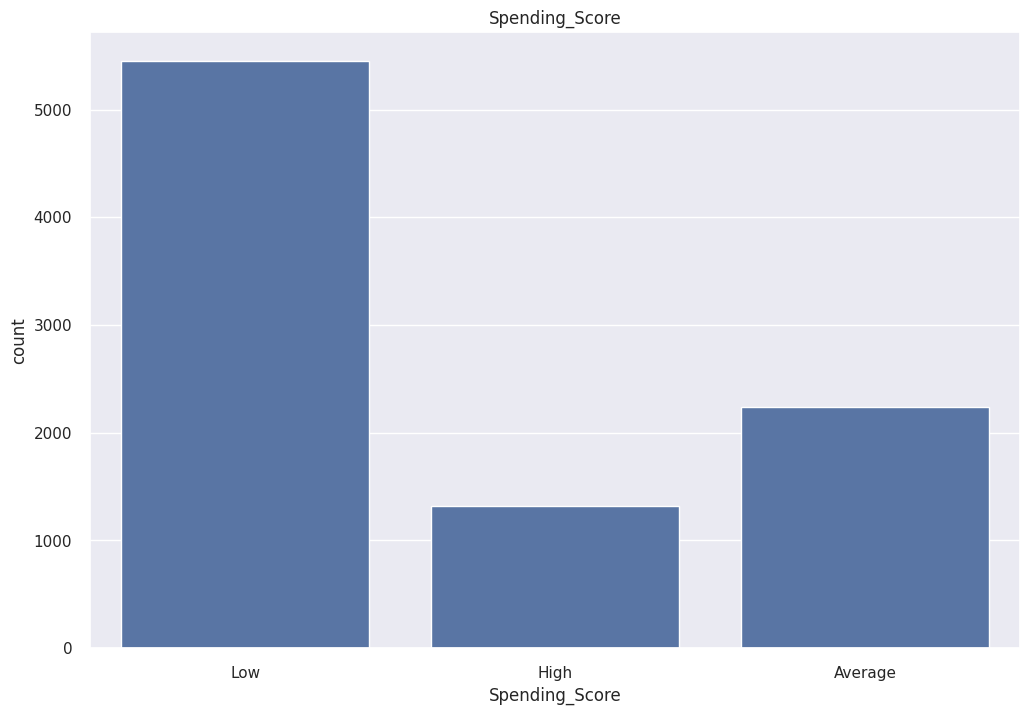


 ---------------------------------------- 



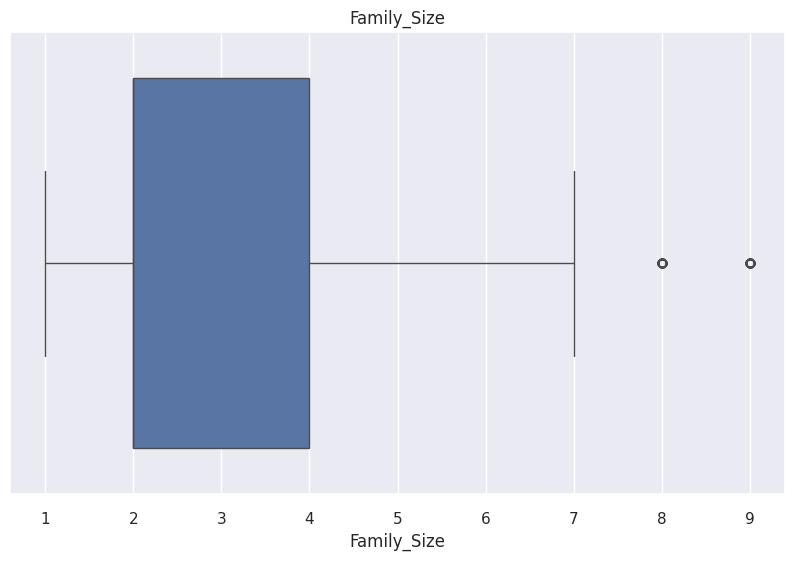


 ---------------------------------------- 



In [12]:
for col in df.columns:
  if col in objs:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=df[col])
    plt.title(col)
    plt.show()
    print('\n', '--'*20, '\n')
  else:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()
    print('\n', '--'*20, '\n')

- We found some outliers. Since Agglomerative Clustering is an algorithm that calculates distance, outliers can have a significant impact.

- Let's address them.

- Since there are few outliers, I decided to impute them using the highest 'non-outlier' value. In other words, I am setting a cap on the possible values for the variables.

In [13]:
def imput(x):
  if x > 10:
    return 10
  else:
    return x

df['Work_Experience'] = df['Work_Experience'].map(imput)

def imput2(x):
  if x > 7:
    return 7
  else:
    return x
df['Family_Size'] = df['Family_Size'].map(imput2)

def imput3(x):
  if x > 86:
    return 86
  else:
    return x
df['Age'] = df['Age'].map(imput3)

In [14]:
df[nums] = df[nums].astype('int')

In [15]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1,Low,4
2,Female,Yes,67,Yes,Engineer,1,Low,1
3,Male,Yes,67,Yes,Lawyer,0,High,2
5,Male,Yes,56,No,Artist,0,Average,2
6,Male,No,32,Yes,Healthcare,1,Low,3


In [16]:
df_initial = df.copy()

## Preprocessing

Let's preprocess the variables as follows:

- Ordinal categorical: OrdinalEncoder

- Nominal categorical: LabelEncoder

- Numerical variables: StandardScaler

In [17]:
score_encoder = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
df['Spending_Score'] = score_encoder.fit_transform(df[['Spending_Score']]).astype('int')

In [18]:
objs2 = df.select_dtypes(include='object').columns.tolist()
objs2

['Gender', 'Ever_Married', 'Graduated', 'Profession']

In [19]:
encoder = LabelEncoder()
for col in objs2:
    df[col] = encoder.fit_transform(df[col])

In [20]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,5,1,0,4
2,0,1,67,1,2,1,0,1
3,1,1,67,1,7,0,2,2
5,1,1,56,0,0,0,1,2
6,1,0,32,1,5,1,0,3


## Feature Engineering

The variables below were tested, but they did not yield a good result.

In [21]:
# df['Score_Age_Life'] = (df['Ever_Married'] + df['Graduated'] + df['Work_Experience']) / df['Age']
# df['Score_Life'] = (df['Ever_Married'] + df['Graduated'] + df['Spending_Score'] + df['Family_Size'])
# df['Score_Work_Life'] = (df['Graduated'] + df['Profession']) ** df['Work_Experience']

In [22]:
df.shape

(9005, 8)

## Correlation

In [23]:
def corr_table(df):
  df_corr = df.corr()
  threshold = 0.5
  filtered_corr = df_corr[(abs(df_corr) > threshold) & (abs(df_corr) != 1)]

  # Filtering only significant correlations and eliminating duplicates
  filtered_corr = filtered_corr.where(np.triu(np.ones(filtered_corr.shape), k=1).astype(bool))

  # Highlighting non-null values.
  styled_corr = filtered_corr.style.applymap(lambda x: 'background-color: green' if pd.notnull(x) else '',
                                              subset=filtered_corr.columns)

  return display(styled_corr)

In [24]:
corr_table(df)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,nan,nan,nan,nan,nan,nan,nan,nan
Ever_Married,nan,nan,0.571847,nan,nan,nan,0.612145,nan
Age,nan,nan,nan,nan,nan,nan,nan,nan
Graduated,nan,nan,nan,nan,nan,nan,nan,nan
Profession,nan,nan,nan,nan,nan,nan,nan,nan
Work_Experience,nan,nan,nan,nan,nan,nan,nan,nan
Spending_Score,nan,nan,nan,nan,nan,nan,nan,nan
Family_Size,nan,nan,nan,nan,nan,nan,nan,nan


Multicollinearity is a **problem**. However, we will apply dimensionality reduction, which will address it

In [25]:
df_encoded = df.copy()

In [26]:
scaler = StandardScaler()

columns = df.columns

df = scaler.fit_transform(df)

df = pd.DataFrame(df, columns=columns)

## Dimensionality Reduction

Before we apply the PCA, let's see how it behaves on this dataset.

In [27]:
pca = PCA(n_components=0.75, random_state = 21)
pca.fit(df)

PCA(n_components=0.75, random_state=21)

In [28]:
print(f"Number of principal components: {pca.n_components_}")
print(f"Variance explained by each component: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_)}")

Number of principal components: 5
Variance explained by each component: [0.28290527 0.1809004  0.12902666 0.12026531 0.11715701]
Total variance explained: 0.8302546426487863


In [29]:
pca = PCA(n_components=2, random_state = 21)

In [30]:
df_pca = pd.DataFrame(pca.fit_transform(df))

# Clustering

I tested DBSCAN and it did not yield a good result.

## AgglomerativeClustering

Let's use the 'K Elbow' method and the 'Silhouette Score' to get an idea of the number of clusters that best fit this dataset.

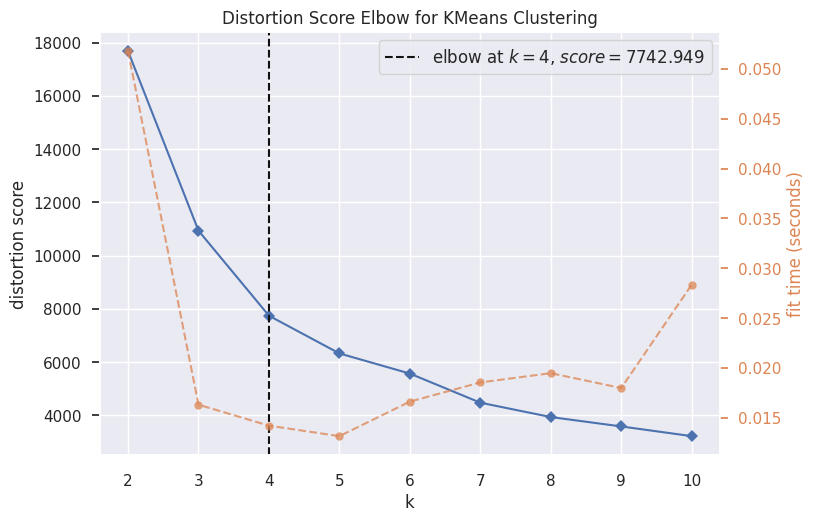

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
elbow = KElbowVisualizer(KMeans(random_state = 21), k=10)
elbow.fit(df_pca)
elbow.show()

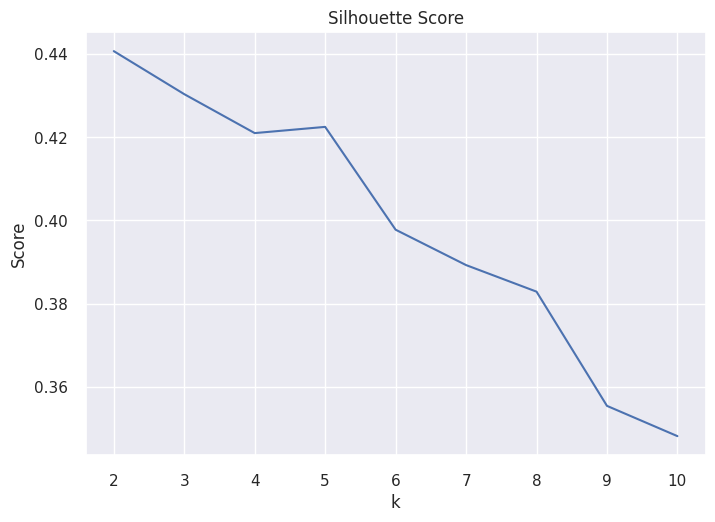

In [32]:
sil_score = []
k_range = range(2, 11)

# k values to be tested (excluding the value 1)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 21)
    kmeans.fit(df_pca)

    if k != 1:
        sil_score.append(silhouette_score(df_pca, kmeans.labels_))

# Plot
plt.plot(k_range, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.show()

I tested the values 3, 4, and 5. The value 4 performed better.

In [33]:
ac = AgglomerativeClustering(n_clusters=4)

df_initial['Clusters'] = ac.fit_predict(df_pca)
df_encoded['Clusters'] = df_initial['Clusters']

In [34]:
cols = [col for col in df_initial.columns if col != 'Clusters']
cols

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size']

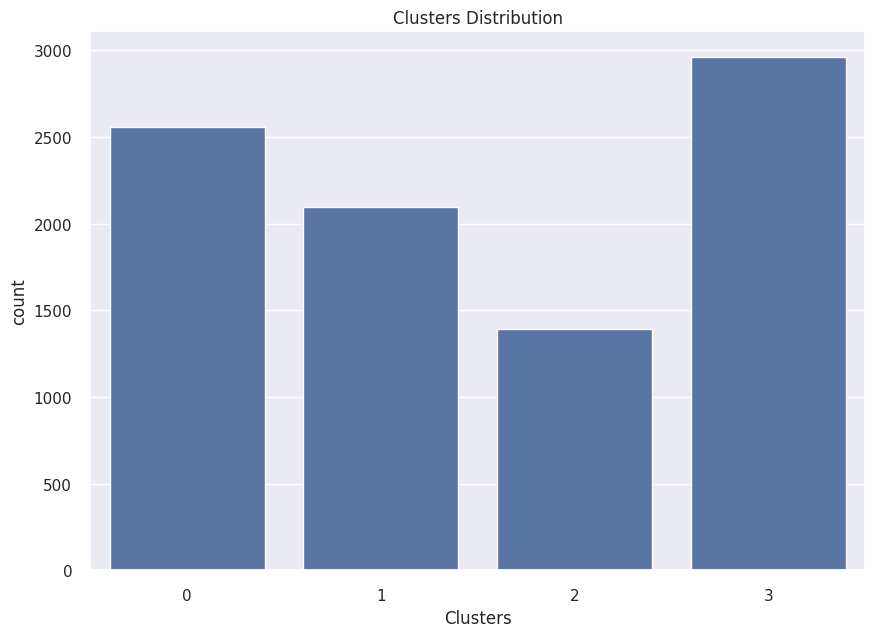

In [35]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df_initial['Clusters'])
plt.title('Clusters Distribution')
plt.show()

In [36]:
df_initial.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Clusters
0,Male,No,22,No,Healthcare,1,Low,4,2
2,Female,Yes,67,Yes,Engineer,1,Low,1,3
3,Male,Yes,67,Yes,Lawyer,0,High,2,1
5,Male,Yes,56,No,Artist,0,Average,2,1
6,Male,No,32,Yes,Healthcare,1,Low,3,0


In [37]:
cats = objs

In [38]:
cats

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

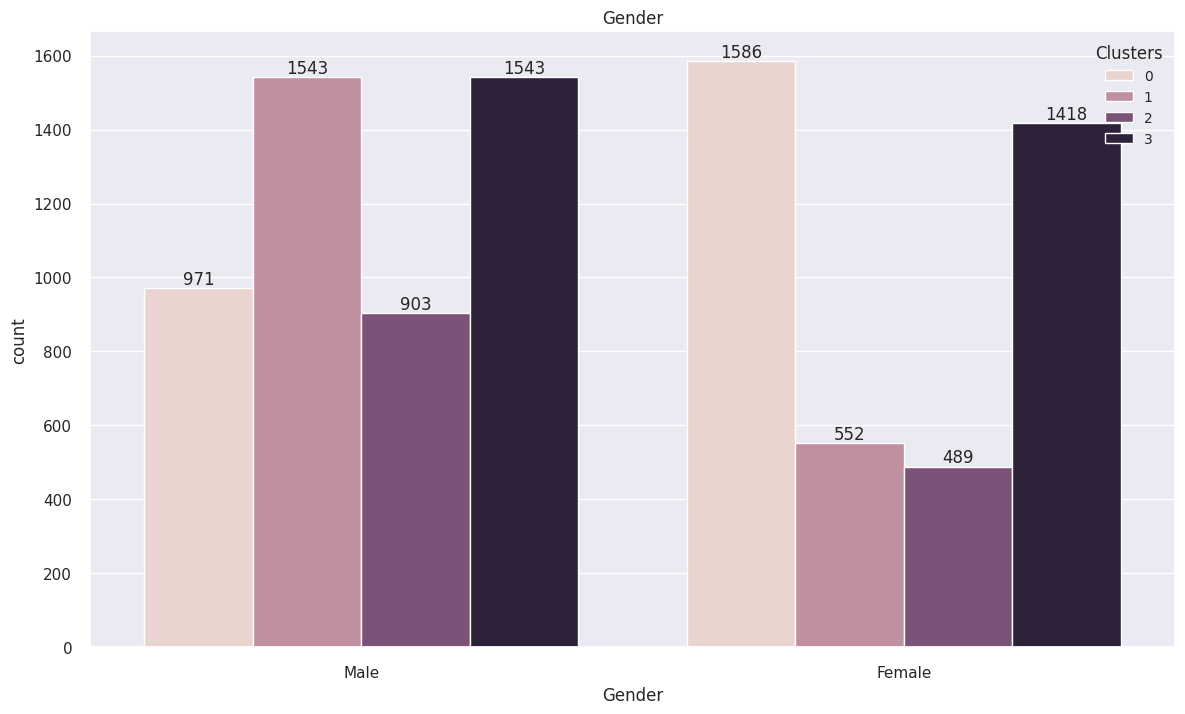


 ---------------------------------------- 



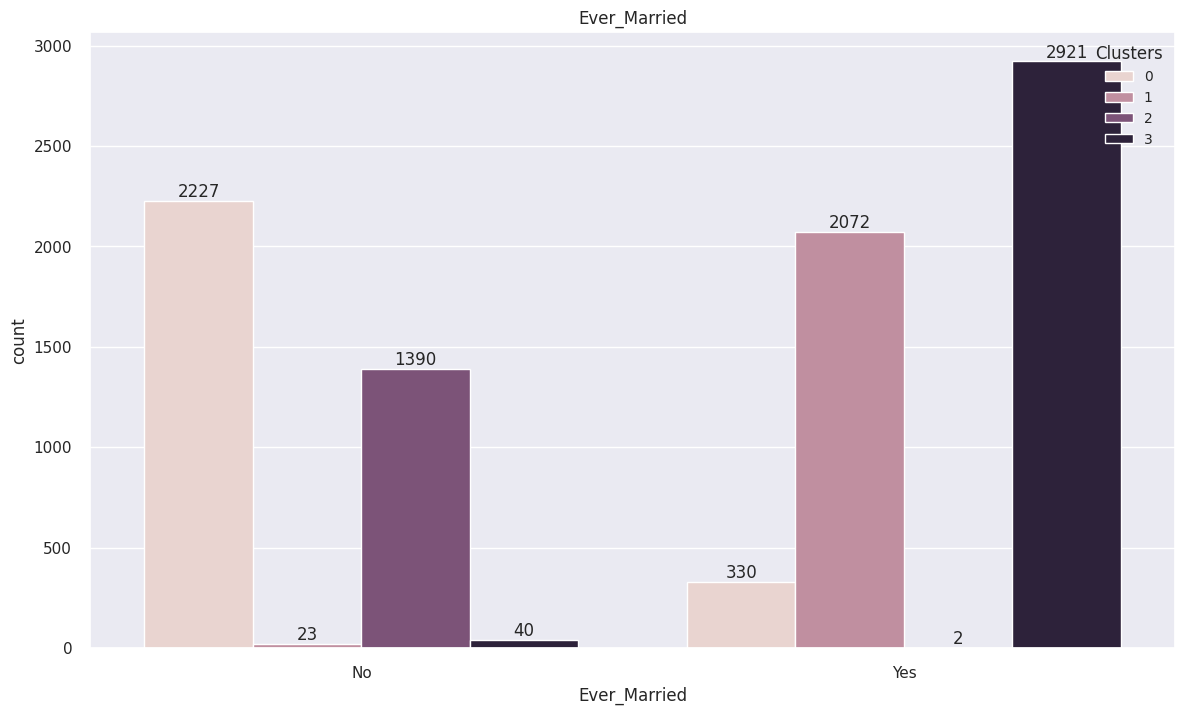


 ---------------------------------------- 



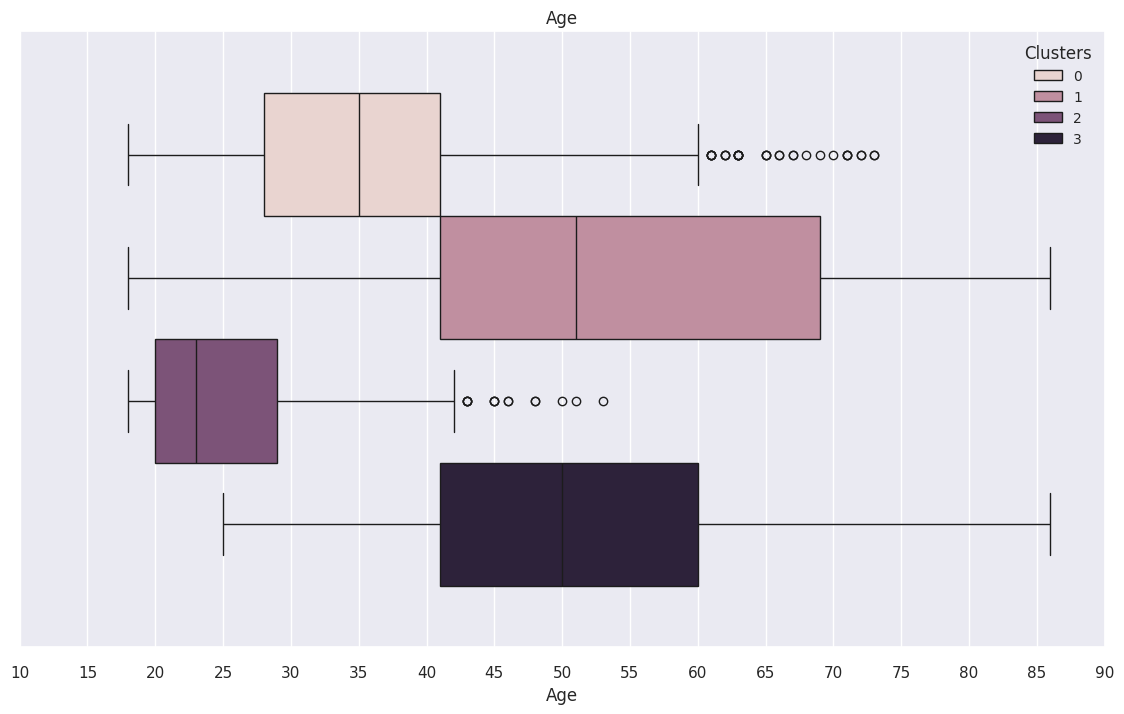


 ---------------------------------------- 



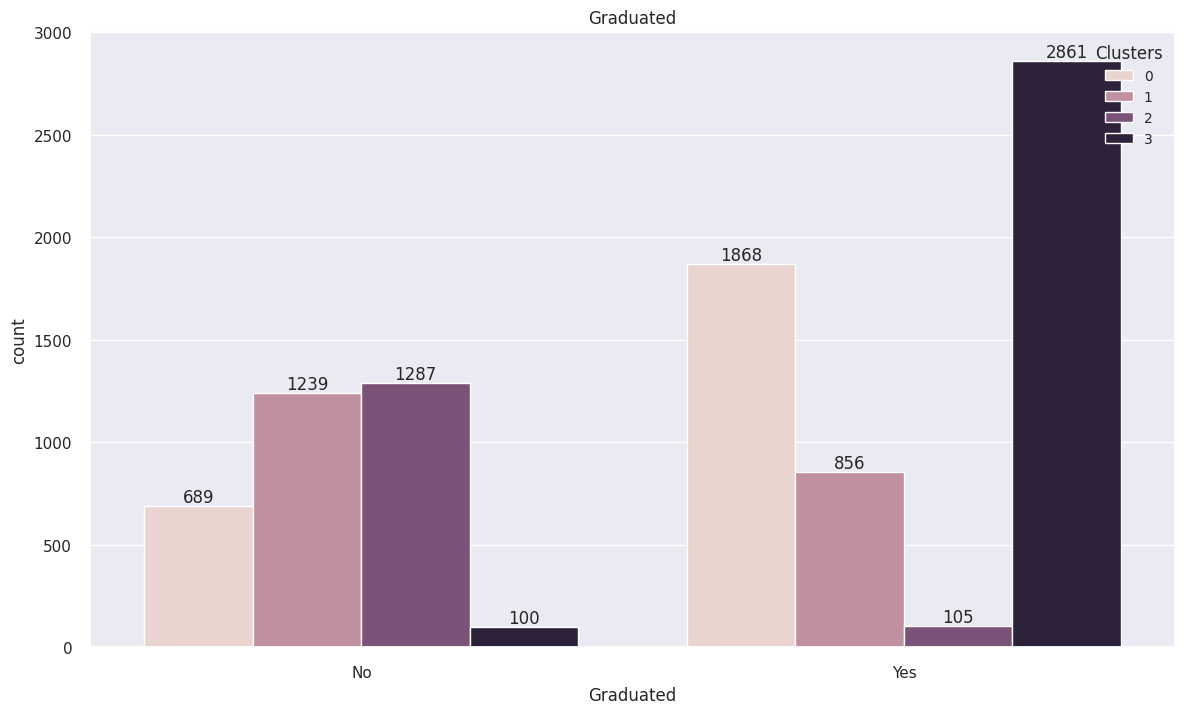


 ---------------------------------------- 



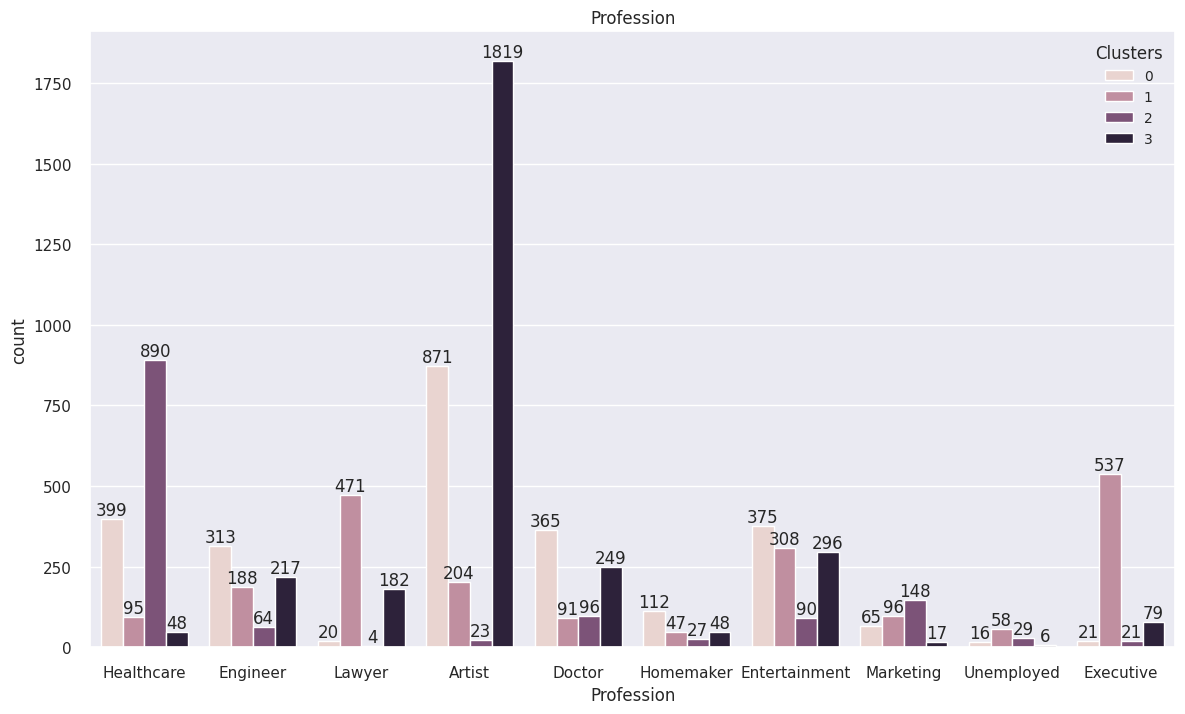


 ---------------------------------------- 



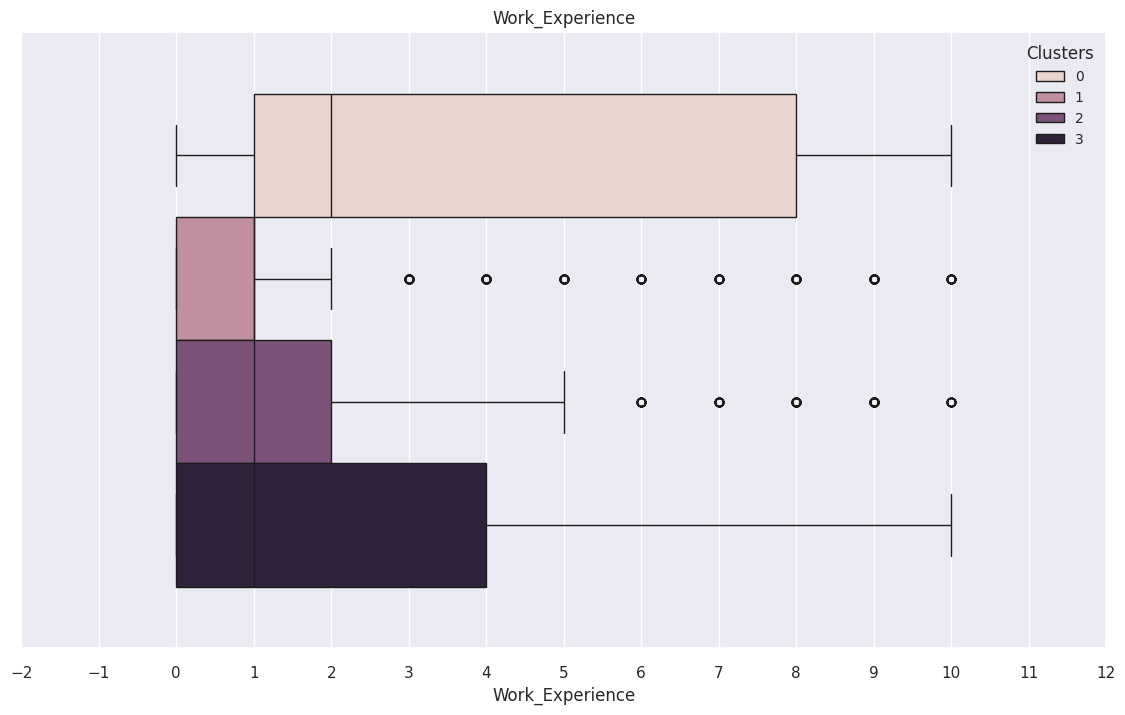


 ---------------------------------------- 



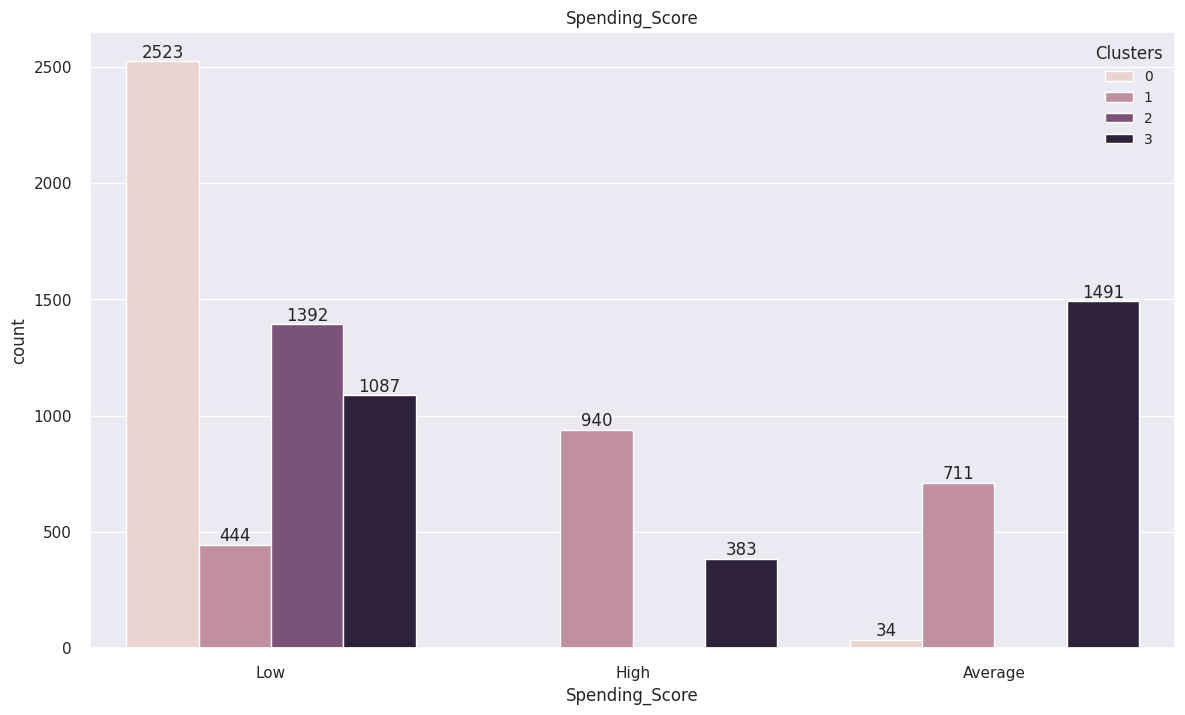


 ---------------------------------------- 



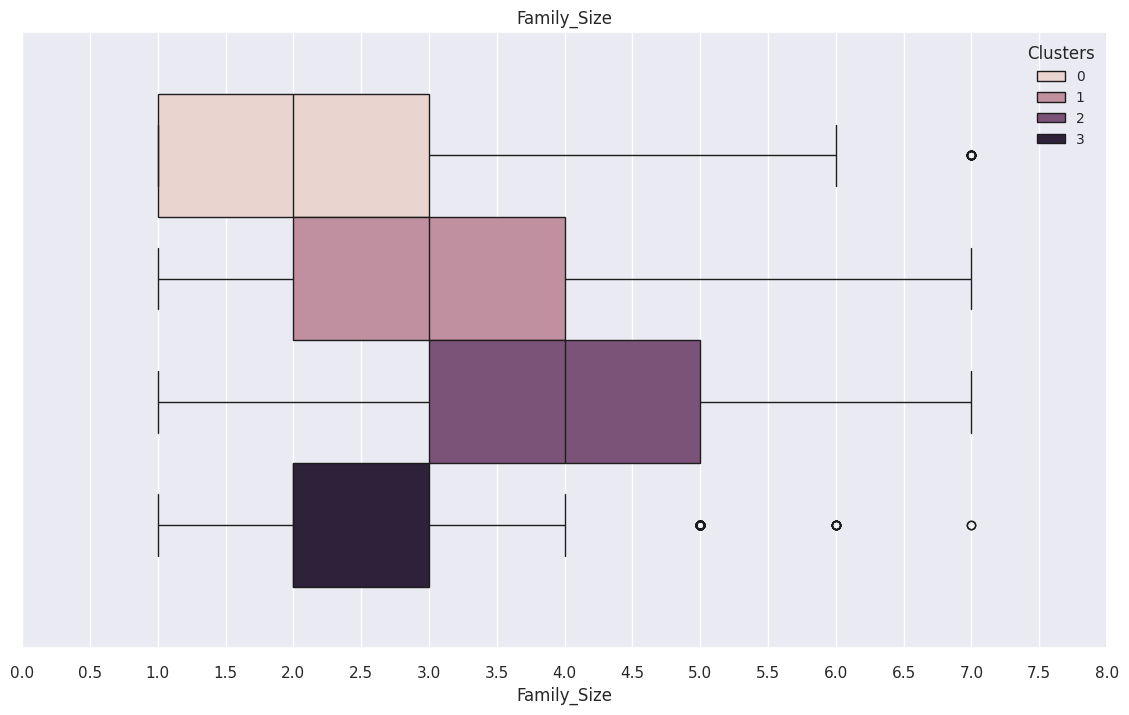


 ---------------------------------------- 



In [39]:
for col in cols:
    plt.figure(figsize=(14, 8))

    if col in cats:
        # Countplot
        ax = sns.countplot(x=df_initial[col], hue=df_initial['Clusters'])
        plt.title(col)

        # Count on top of each bar
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}',
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom')

    else:
        # Boxplot
        sns.boxplot(x=df_initial[col], hue=df_initial['Clusters'])
        plt.title(col)
        current_ticks = plt.xticks()[0]

        # Adding ticks between the existing ones on the x-axis.
        new_ticks = []
        for i in range(len(current_ticks) - 1):
            new_ticks.append(current_ticks[i])
            new_ticks.append((current_ticks[i] + current_ticks[i + 1]) / 2)
        new_ticks.append(current_ticks[-1])  # Adiciona o último tick

        plt.xticks(new_ticks)

    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Clusters', fontsize='small', title_fontsize='medium')
    plt.show()
    print('\n', '--'*20, '\n')

# Final Report

**CLUSTER 0** | 2557 customers

- Ever Married
  - 85% have never married

- Age
  - Age concentration is between 28 and 41 years
  - The youngest are 18 years old, and the oldest are 60

- Graduation
  - About 63% are graduates

- Profession
  - Artists are the majority (34%)
  - Healthcare, Engineer, Doctor, and Entertainment have similar counts, between 313 and 399 clients, and together they make up more than half of the professions (54%)

- Work Experience
  - It is the group with the greatest variation in work experience, with a concentration between 1 and 8 years. It is also the most experienced group

- Spending Score
  - Represents 46% of low-spending customers
  - A group composed only of low-spending customers

<hr>

**CLUSTER 1** | 2095 customers

- Gender
  - Nearly three times more men than women

- Ever Married
  - Over 98% have been married

- Age
  - The age concentration is the oldest, between 41 and 69 years
  - Also the group with the greatest variability, the youngest being 18 years old, and the oldest being 86

- Profession
  - Represents 81% of executives and 69% of lawyers. Both are the majority in this group

- Work Experience
  - The group with the least work experience

- Spending Score
  - Has the highest spending. Represents 71% of high-spending customers

<hr>

**CLUSTER 2** | 1392 customers

- Ever Married
  - Never married

- Age
  - The youngest group, with an age concentration between 20 and 29 years
  - The youngest are 18 years old, and the oldest are 42

- Graduation
  - 92% are not graduates

- Profession
  - The majority work in Healthcare (63%)

- Spending Score
  - 100% of the group are low-spending customers

- Family Size
  - Group with the largest family size, concentrated between 3 and 5

<hr>

**CLUSTER 3** | 2961 customers

- Gender
  - Similar number of men and women

- Ever Married
  - Over 98% have been married

- Age
  - Age concentration between 41 and 60 years
  - A mature group, with the youngest being 25 years old and the oldest being 86, making it a very varied group

- Graduation
  - Over 96% are graduates

- Profession
  - The majority are artists (61%)

- Spending Score
  - Along with group 1, these are the groups with the greatest variation in spending. Also, they are the only ones with high-spending customers, although group 3 has less than half of group 1
  - It can be considered a medium spending group, where most of its customers are found

- Family Size
  - Family size with a concentration between 2 and 3. The least varied group